The problem posed is as follows:
A computer store specializing in used computers is unaware of how its revenue fluctuates, which type of computer sells the most, and which representative store sells the highest number of computers. Please investigate and visualize the dataset "Capstone.xlsx".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Capstone.xlsx')

In [99]:
df.dtypes

CustomerID             object
OrderID                object
Channel                object
PaymentType            object
Brand                  object
Shop                   object
Promotion              object
SalePrice             float64
Expense               float64
SaleDate       datetime64[ns]
Reference              object
TypeSale             category
dtype: object

In [3]:
df.head()

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,Expense,SaleDate,Reference,Cột1,Cột2,Cột3,Cột4,Cột5,Cột6,Cột7,Cột8
0,CTM012,OTS015,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000.0,20250000.0,2022-04-23,Khác,"Thông qua người thân, bạn bè",,,,,,,Khác
1,CTM10164,OTS831,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000.0,2295200.0,2022-08-03,Nhân viên cửa hàng bán Laptop,Nhân viên cửa hàng bán Laptop,Nhân viên cửa hàng bán Laptop,,,,,,
2,CTM10246,OTS293,Offline,Tiền mặt,Dell,FPT Shop,Có,18310000.0,14098700.0,2022-10-09,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, We...",Mạng xã hội,Nhân viên cửa hàng bán Laptop,,Mạng xã hội,Website,,,
3,CTM1028,OTS34756,Offline,Tiền mặt,MSI,Phong Vũ,Không,12203000.0,9396310.0,2022-05-24,"Thông qua người thân, bạn bè, Nhân viên cửa hà...",Website,Nhân viên cửa hàng bán Laptop,"Thông qua người thân, bạn bè",Mạng xã hội,,,,
4,CTM1028,OTS1044,Offline,Tiền mặt,Asus,Thế giới di động,Có,13070000.0,9279700.0,2022-10-08,Nhờ người có chuyên môn tư vấn,Phương tiện truyền thông,,,,,,Nhờ người có chuyên môn tư vấn,


In [4]:
#xử lý xóa các cột không cần thiết

In [5]:
print(df.columns)

Index(['CustomerID', 'OrderID', 'Channel', 'PaymentType', 'Brand', 'Shop',
       'Promotion', 'SalePrice', 'Expense', 'SaleDate', 'Reference', 'Cột1',
       'Cột2', 'Cột3', 'Cột4', 'Cột5', 'Cột6', 'Cột7', 'Cột8'],
      dtype='object')


In [6]:
df=df.drop(columns=['Cột1',
       'Cột2', 'Cột3', 'Cột4', 'Cột5', 'Cột6', 'Cột7', 'Cột8'])

In [7]:
df.head()

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,Expense,SaleDate,Reference
0,CTM012,OTS015,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000.0,20250000.0,2022-04-23,Khác
1,CTM10164,OTS831,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000.0,2295200.0,2022-08-03,Nhân viên cửa hàng bán Laptop
2,CTM10246,OTS293,Offline,Tiền mặt,Dell,FPT Shop,Có,18310000.0,14098700.0,2022-10-09,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, We..."
3,CTM1028,OTS34756,Offline,Tiền mặt,MSI,Phong Vũ,Không,12203000.0,9396310.0,2022-05-24,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
4,CTM1028,OTS1044,Offline,Tiền mặt,Asus,Thế giới di động,Có,13070000.0,9279700.0,2022-10-08,Nhờ người có chuyên môn tư vấn


In [8]:
#xử lý null

In [9]:
df.isnull().values.any()

True

In [10]:
df.isnull().sum().sum()

30

In [11]:
df['SalePrice'].mean()

12077155.033333333

In [12]:
df.SalePrice.fillna(df.SalePrice.mean(),inplace=True)

In [13]:
df.Reference.fillna('Khác',inplace=True)

In [14]:
df.groupby('Channel').size()

Channel
Offline    785
Online     778
dtype: int64

In [15]:
df.Channel.fillna('Offline',inplace=True)

In [16]:
df.groupby('PaymentType').size()

PaymentType
Thẻ         1180
Tiền mặt     384
dtype: int64

In [17]:
df.PaymentType.fillna('Thẻ',inplace=True)

In [18]:
df.groupby('Shop').size().sort_values(ascending=False)

Shop
FPT Shop               293
Thế giới di động       262
Điện máy xanh          179
Phong Vũ               167
Viễn thông A           167
Techcare               164
Nguyễn Kim             112
Viettel Store           91
Khác                    81
Phi Long Technology     25
Chợ Lớn                 20
dtype: int64

In [19]:
df.Shop.fillna('FPT Shop',inplace=True)

In [20]:
df.groupby('Brand').size().sort_values(ascending=False)

Brand
Asus         402
Dell         349
HP           269
Acer         182
Apple        143
MSI          133
Lenovo        57
Microsoft     27
DellXPS        1
LenovoX1       1
dtype: int64

In [21]:
df.Brand.fillna('Asus',inplace=True)

In [22]:
df.isnull().sum()

CustomerID     3
OrderID        7
Channel        0
PaymentType    0
Brand          0
Shop           0
Promotion      0
SalePrice      0
Expense        0
SaleDate       0
Reference      0
dtype: int64

In [23]:
selected_records = df[df['CustomerID'].isnull()]
print(selected_records)

     CustomerID   OrderID  Channel PaymentType Brand           Shop Promotion  \
1563        NaN   OTS1000  Offline    Tiền mặt  Dell  Điện máy xanh        Có   
1564        NaN  OTS36486   Online         Thẻ  Asus  Điện máy xanh     Không   
1565        NaN  OTS65519   Online         Thẻ    HP   Viễn thông A     Không   

         SalePrice      Expense   SaleDate  \
1563  1.207716e+07         0.00 2022-02-17   
1564  1.860000e+07  14136000.00 2022-12-21   
1565  1.641000e+03      1279.98 2022-12-25   

                                              Reference  
1563                                               Khác  
1564                      Nhân viên cửa hàng bán Laptop  
1565  Thông qua người thân, bạn bè, Nhân viên cửa hà...  


In [24]:
import random
df.CustomerID.fillna('CTM'+str(random.randrange(999,2000)),inplace=True)

In [28]:
df.head()

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,Expense,SaleDate,Reference
0,CTM012,OTS015,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000.0,20250000.0,2022-04-23,Khác
1,CTM10164,OTS831,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000.0,2295200.0,2022-08-03,Nhân viên cửa hàng bán Laptop
2,CTM10246,OTS293,Offline,Tiền mặt,Dell,FPT Shop,Có,18310000.0,14098700.0,2022-10-09,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, We..."
3,CTM1028,OTS34756,Offline,Tiền mặt,MSI,Phong Vũ,Không,12203000.0,9396310.0,2022-05-24,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
4,CTM1028,OTS1044,Offline,Tiền mặt,Asus,Thế giới di động,Có,13070000.0,9279700.0,2022-10-08,Nhờ người có chuyên môn tư vấn


In [29]:
selected_records = df[df['OrderID'].isnull()]
print(selected_records)

Empty DataFrame
Columns: [CustomerID, OrderID, Channel, PaymentType, Brand, Shop, Promotion, SalePrice, Expense, SaleDate, Reference]
Index: []


In [30]:
import random
df.OrderID.fillna('OTS'+str(random.randrange(100,999)),inplace=True)

In [31]:
df.isnull().sum()

CustomerID     0
OrderID        0
Channel        0
PaymentType    0
Brand          0
Shop           0
Promotion      0
SalePrice      0
Expense        0
SaleDate       0
Reference      0
dtype: int64

In [32]:
df.isnull().sum().sum()

0

In [33]:
#Hết null

In [34]:
df

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,Expense,SaleDate,Reference
0,CTM012,OTS015,Online,Thẻ,LenovoX1,Phong Vũ,Không,2.700000e+07,20250000.00,2022-04-23,Khác
1,CTM10164,OTS831,Offline,Tiền mặt,Apple,Viettel Store,Không,3.020000e+06,2295200.00,2022-08-03,Nhân viên cửa hàng bán Laptop
2,CTM10246,OTS293,Offline,Tiền mặt,Dell,FPT Shop,Có,1.831000e+07,14098700.00,2022-10-09,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, We..."
3,CTM1028,OTS34756,Offline,Tiền mặt,MSI,Phong Vũ,Không,1.220300e+07,9396310.00,2022-05-24,"Thông qua người thân, bạn bè, Nhân viên cửa hà..."
4,CTM1028,OTS1044,Offline,Tiền mặt,Asus,Thế giới di động,Có,1.307000e+07,9279700.00,2022-10-08,Nhờ người có chuyên môn tư vấn
...,...,...,...,...,...,...,...,...,...,...,...
1561,CTM99985,OTS60931,Online,Thẻ,Asus,Điện máy xanh,Không,4.248000e+06,3228480.00,2022-01-11,"Thông qua người thân, bạn bè, Nhờ người có chu..."
1562,CTM99985,OTS451,Offline,Tiền mặt,Dell,FPT Shop,Không,1.439000e+07,10792500.00,2022-12-26,"Thông qua người thân, bạn bè, Mạng xã hội"
1563,CTM1357,OTS1000,Offline,Tiền mặt,Dell,Điện máy xanh,Có,1.207716e+07,0.00,2022-02-17,Khác
1564,CTM1357,OTS36486,Online,Thẻ,Asus,Điện máy xanh,Không,1.860000e+07,14136000.00,2022-12-21,Nhân viên cửa hàng bán Laptop


In [50]:
df['TypeSale']=pd.cut(df['SalePrice'],3,labels=['Cheap','Mid-range Price','Expensive'])
df.head()

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,Expense,SaleDate,Reference,TypeSale
0,CTM012,OTS015,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000.0,20250000.0,2022-04-23,Khác,Mid-range Price
1,CTM10164,OTS831,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000.0,2295200.0,2022-08-03,Nhân viên cửa hàng bán Laptop,Cheap
2,CTM10246,OTS293,Offline,Tiền mặt,Dell,FPT Shop,Có,18310000.0,14098700.0,2022-10-09,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, We...",Cheap
3,CTM1028,OTS34756,Offline,Tiền mặt,MSI,Phong Vũ,Không,12203000.0,9396310.0,2022-05-24,"Thông qua người thân, bạn bè, Nhân viên cửa hà...",Cheap
4,CTM1028,OTS1044,Offline,Tiền mặt,Asus,Thế giới di động,Có,13070000.0,9279700.0,2022-10-08,Nhờ người có chuyên môn tư vấn,Cheap


In [51]:
#đổi sale price từ USD sang VND

In [52]:
filtered_df = df[df["SalePrice"] < 10000 ]
# In ra những bản ghi thỏa mãn điều kiện
print(filtered_df["SalePrice"])


Series([], Name: SalePrice, dtype: float64)


In [53]:
df.loc[df["SalePrice"] <10000 , "SalePrice"] = df.loc[df["SalePrice"] < 10000, "SalePrice"] * 23000


In [54]:
#check
filtered_df_2 = df[df["SalePrice"] < 10000 ]
print(filtered_df_2["SalePrice"])

Series([], Name: SalePrice, dtype: float64)


In [55]:
df['SalePrice'].mean()

15800739.837931033

In [56]:
df["SalePrice"] = df["SalePrice"].replace(0.0, 15790656)

In [57]:
#check again
filtered_df_2 = df[df["SalePrice"] < 10000 ]
print(filtered_df_2["SalePrice"])
#oke

Series([], Name: SalePrice, dtype: float64)


In [58]:
#Đổi Expense từ USD sang VND
filtered_df = df[df["Expense"] < 10000 ]
# In ra những bản ghi thỏa mãn điều kiện
print(filtered_df["Expense"])

Series([], Name: Expense, dtype: float64)


In [59]:
df.loc[df["Expense"] <10000 , "Expense"] = df.loc[df["Expense"] < 10000, "Expense"] * 23000


In [60]:
filtered_df_2 = df[df["Expense"] < 10000 ]
print(filtered_df_2["Expense"])

Series([], Name: Expense, dtype: float64)


In [61]:
df['Expense'].mean()

11894852.98403576

In [62]:
df["Expense"] = df["Expense"].replace(0.0,11841919)

In [63]:
filtered_df_2 = df[df["Expense"] < 10000 ]
print(filtered_df_2["Expense"])

Series([], Name: Expense, dtype: float64)


In [64]:
df.head()

,CustomerID,OrderID,Channel,PaymentType,Brand,Shop,Promotion,SalePrice,Expense,SaleDate,Reference,TypeSale
0,CTM012,OTS015,Online,Thẻ,LenovoX1,Phong Vũ,Không,27000000.0,20250000.0,2022-04-23,Khác,Mid-range Price
1,CTM10164,OTS831,Offline,Tiền mặt,Apple,Viettel Store,Không,3020000.0,2295200.0,2022-08-03,Nhân viên cửa hàng bán Laptop,Cheap
2,CTM10246,OTS293,Offline,Tiền mặt,Dell,FPT Shop,Có,18310000.0,14098700.0,2022-10-09,"Nhân viên cửa hàng bán Laptop, Mạng xã hội, We...",Cheap
3,CTM1028,OTS34756,Offline,Tiền mặt,MSI,Phong Vũ,Không,12203000.0,9396310.0,2022-05-24,"Thông qua người thân, bạn bè, Nhân viên cửa hà...",Cheap
4,CTM1028,OTS1044,Offline,Tiền mặt,Asus,Thế giới di động,Có,13070000.0,9279700.0,2022-10-08,Nhờ người có chuyên môn tư vấn,Cheap


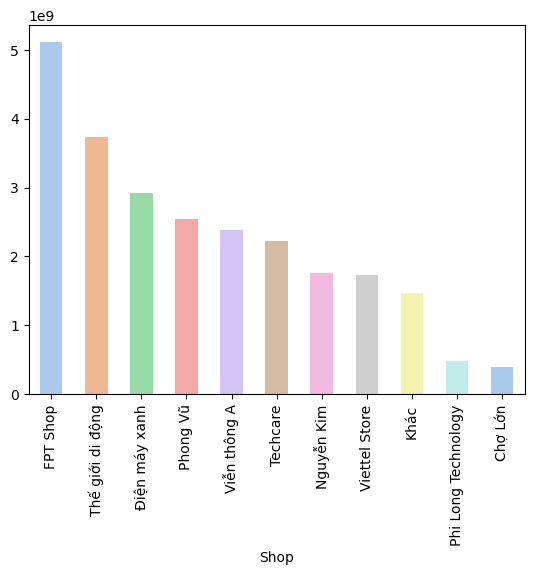

In [115]:
total_by_shop = df.groupby('Shop')['SalePrice'].sum().sort_values(ascending=False)
list_total_sales = total_by_shop.values
list_shop = total_by_shop.index
sns.barplot(data=df, x=list_shop, y=list_total_sales, estimator=np.mean, width=0.5, palette='pastel', order=total_by_brand.index)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
#FPT shop là cửa hàng có doanh thu lớn nhất 

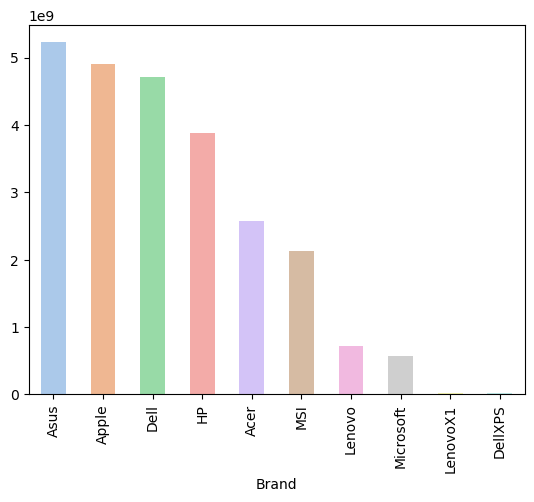

In [117]:
total_by_brand = df.groupby('Brand')['SalePrice'].sum().sort_values(ascending=False)
list_total_sales = total_by_brand.values
list_Brand = total_by_brand.index
sns.barplot(data=df, x=list_Brand, y=list_total_sales, estimator=np.mean, width=0.5, palette='pastel', order=total_by_brand.index)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Asus là hãng máy tính đem lại doanh thu cao nhất 

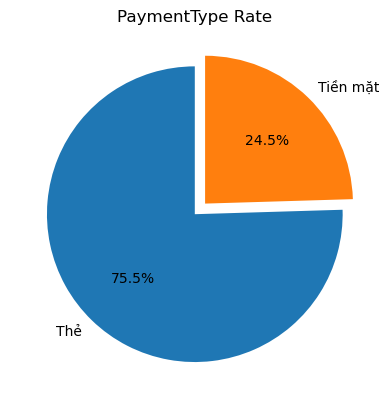

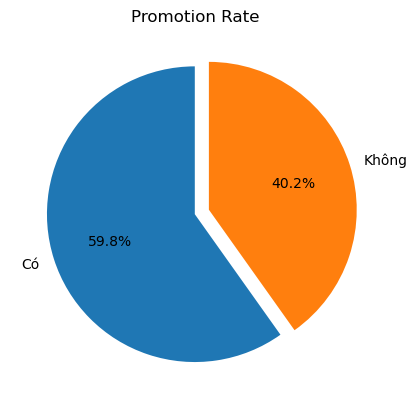

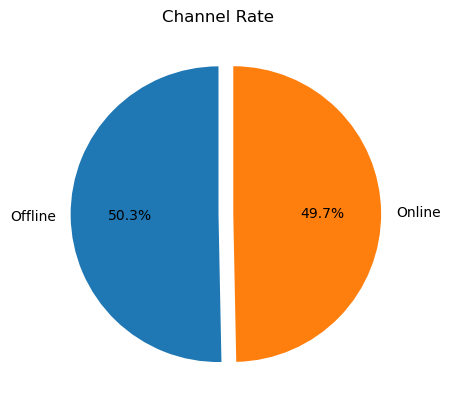

In [87]:
def plot_pie_chart(df, column_name, title):
    explode = (0, 0.1)
    df_gr = df.groupby(column_name).size()

    df_gr.plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, explode=explode)
    plt.title(title)
    plt.show()
plot_pie_chart(df, 'PaymentType', 'PaymentType Rate')
plot_pie_chart(df, 'Promotion', 'Promotion Rate')
plot_pie_chart(df, 'Channel', 'Channel Rate')


In [119]:
#Khách hàng đa phần thanh toán bằng thẻ thay vì tiền mặt, điều này dễ hiểu vì khi đi mua máy tính, tiền mặt sẽ có rủi ro cao hơn và tốn thời gian thanh toán hơn
#Bán hàng online hay offline cũng không có nhiều sự khác biệt
#khách hàng có xu hướng mua hàng có áp dụng khuyến mãi và giảm giá hơn 

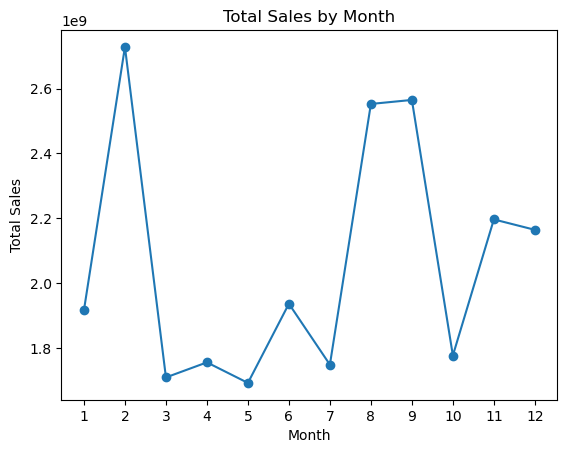

In [84]:
TotalSalesByMonth = df.groupby(df['SaleDate'].dt.month)['SalePrice'].sum()

List_month = TotalSalesByMonth.index
List_TotalSales = TotalSalesByMonth.values

plt.plot(List_month, List_TotalSales, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(range(1, 13))

plt.show()


In [ ]:
#tháng 2 và khoảng thời gian từ thang 8 đến tháng 9 thu hút nhiều khách hàng mua sản phẩm
#tháng 2 là thời điểm sau têt, các bạn học sinh sinh viên có thêm ngân sách để mua máy tính
#tháng 8 và 9 là thời điểm sau khi thi chuyển cấp,sinh viên có nhu cầu mua máy tính lớn hơn -> doanh thu thời gian này tăng  

In [ ]:
#  kết luận: nên áp dụng các chương trình khuyến mãi và giảm giá vào các tháng khác trong năm ngoại trừ 2,8 và 9 để doanh thu các tháng khác được đẩy lên 